# Analyzing the Economic and Social Impact of IPL Using Data Analytics

## Objective

In this project, we aim to analyze the economic and social impact of the Indian Premier League (IPL) using various datasets related to advertisers, revenues, demographics, and contracts.

In [2]:
from google.colab import files
uploaded = files.upload()


Saving fact_ipl_advertisers.xlsx to fact_ipl_advertisers.xlsx
Saving fact_ipl_central_contracts.xlsx to fact_ipl_central_contracts.xlsx
Saving fact_revenue_demography.xlsm to fact_revenue_demography.xlsm
Saving fact_summary_demography.xlsx to fact_summary_demography.xlsx


## IPL Central Contracts Breakdown

This section breaks down central contracts to reveal earnings and contributions from different franchises.

## IPL Central Contracts Breakdown

This section breaks down central contracts to reveal earnings and contributions from different franchises.

In [3]:
import pandas as pd

# Load the file you just uploaded
import pandas as pd

# Load the file you just uploaded
df = pd.read_excel("fact_ipl_advertisers.xlsx")  # or .csv if you saved as CSV
df.head()

df_advertisers = pd.read_excel("fact_ipl_advertisers.xlsx")
df_contracts = pd.read_excel("fact_ipl_central_contracts.xlsx")
df_revenue_demo = pd.read_excel("fact_revenue_demography.xlsm")
df_summary_demo = pd.read_excel("fact_summary_demography.xlsx")
# Preview top rows
df_advertisers.head(), df_contracts.head(), df_revenue_demo.head(), df_summary_demo.head()


(   sno                  advertiser_brand                    category  \
 0    1  Vishnu Packaging (Vimal Elaichi)  Pan Masala/Mouth Freshener   
 1    2     Sporta Technologies (Dream11)    Fantasy Gaming / Betting   
 2    3        Reliance Consumer Products            FMCG / Beverages   
 3    4                        My11Circle    Fantasy Gaming / Betting   
 4    5    Rajshree Silver Coated Elaichi  Pan Masala/Mouth Freshener   
 
                                    brand_ambassadors celebrity_influence  \
 0           Shah Rukh Khan, Ajay Devgn, Akshay Kumar      Extremely High   
 1  Rohit Sharma, Aamir Khan, Ranbir Kapoor, Varun...          Very  High   
 2                                           multiple              Medium   
 3  Sourav Ganguly, Shubman Gill, Mohammed Siraj, ...                High   
 4                                        Salman Khan          Very  High   
 
                               health_social_risk  
 0  Extremely High - Carcinogenic (Surrogate

## **Checking number of rows and columns in data**

In [4]:
df_advertisers.shape

(10, 6)

In [5]:
df_contracts.shape

(9, 5)

In [6]:
df_revenue_demo.shape

(6, 9)

In [7]:
df_summary_demo.shape

(3, 4)

## **3. Clean up the risk column**

In [8]:
df['health_social_risk'].unique()
df['health_social_risk'] = df['health_social_risk'].astype(str).str.strip()
df[['advertiser_brand', 'health_social_risk']].head()



,advertiser_brand,health_social_risk
0,Vishnu Packaging (Vimal Elaichi),Extremely High - Carcinogenic (Surrogate Ads)
1,Sporta Technologies (Dream11),Extremely High - Promotes Gambling
2,Reliance Consumer Products,Moderate (Sugar Content)
3,My11Circle,Extremely High - Promotes Gambling
4,Rajshree Silver Coated Elaichi,Carcinogenic (Surrogate Ads)


# **4. Extract risk_level based on keywords**



In [9]:
def extract_risk_level(text):
    text = text.lower()
    if "extremely high" in text:
        return "Extremely High"
    elif "very high" in text:
        return "Very High"
    elif "high" in text:
        return "High"
    elif "moderate" in text:
        return "Moderate"
    elif "low" in text:
        return "Low"
    else:
        return None

df['risk_level'] = df['health_social_risk'].apply(extract_risk_level)
df[['advertiser_brand', 'risk_level']].head()


,advertiser_brand,risk_level
0,Vishnu Packaging (Vimal Elaichi),Extremely High
1,Sporta Technologies (Dream11),Extremely High
2,Reliance Consumer Products,Moderate
3,My11Circle,Extremely High
4,Rajshree Silver Coated Elaichi,None


# **5. Check Risk Level Counts**

In [10]:
# STEP 6: See how many advertisers fall into each level
df['risk_level'].value_counts(dropna=False)


,count
risk_level,
Extremely High,4
Moderate,3
None,2
Low,1


# **6. Filter Valid Risk Data**

In [11]:
# STEP 7: Keep only valid risk level entries
filtered_df = df[df['risk_level'].notna()]
filtered_df.head()


,sno,advertiser_brand,category,brand_ambassadors,celebrity_influence,health_social_risk,risk_level
0,1,Vishnu Packaging (Vimal Elaichi),Pan Masala/Mouth Freshener,"Shah Rukh Khan, Ajay Devgn, Akshay Kumar",Extremely High,Extremely High - Carcinogenic (Surrogate Ads),Extremely High
1,2,Sporta Technologies (Dream11),Fantasy Gaming / Betting,"Rohit Sharma, Aamir Khan, Ranbir Kapoor, Varun...",Very High,Extremely High - Promotes Gambling,Extremely High
2,3,Reliance Consumer Products,FMCG / Beverages,multiple,Medium,Moderate (Sugar Content),Moderate
3,4,My11Circle,Fantasy Gaming / Betting,"Sourav Ganguly, Shubman Gill, Mohammed Siraj, ...",High,Extremely High - Promotes Gambling,Extremely High
5,6,Parle Biscuits,FMCG (Biscuits & Snacks),"Ananya Panday, Lakshya (Hide & Seek)",Moderate,Moderate (Sugar Content),Moderate


# **7. Visualize With Chart**

<ipython-input-12-321142db0e20>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


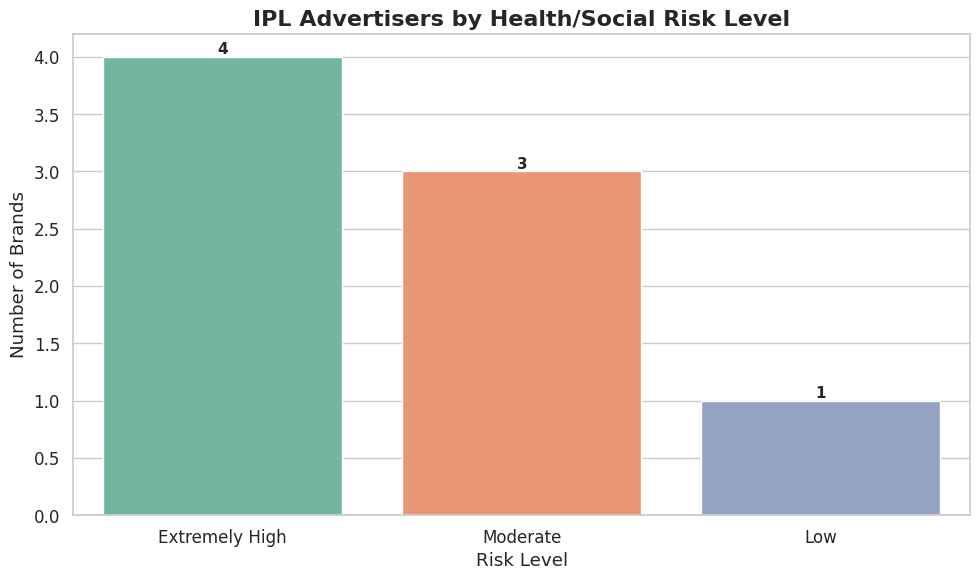

In [12]:
# STEP 8: Bar chart of advertisers by risk level
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=filtered_df,
    x='risk_level',
    palette='Set2',
    order=filtered_df['risk_level'].value_counts().index
)

# Add count labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("IPL Advertisers by Health/Social Risk Level", fontsize=16, fontweight='bold')
plt.xlabel("Risk Level")
plt.ylabel("Number of Brands")
plt.tight_layout()
plt.show()


In [13]:
# Strip spaces in column names
df_contracts.columns = df_contracts.columns.str.strip()

# 1. Convert amount columns to float
df_contracts['amount_in_crores_2025'] = pd.to_numeric(df_contracts['amount_in_crores_2025'], errors='coerce')
df_contracts['total_deal_value_in_crores'] = pd.to_numeric(df_contracts['total_deal_value_in_crores'], errors='coerce')

# 2. Extract start_year and end_year from contract_duration
df_contracts[['start_year', 'end_year']] = df_contracts['contract_duration'].str.extract(r'\((\d{4})\s*-\s*(\d{4})\)').astype(float)

# Preview cleaned contract dataset
df_contracts.head()



,contract_type,partner_sponsor_name,amount_in_crores_2025,total_deal_value_in_crores,contract_duration,start_year,end_year
0,Title Sponsor,Tata Group,500.0,2500.0,5 Years (2024 - 2028),2024.0,2028.0
1,Associate Partner,My11Circle,125.0,625.0,5 Years (2024 - 2028),2024.0,2028.0
2,Associate Partner,Angel One,82.0,410.0,5 Years (2024 - 2028),2024.0,2028.0
3,Associate Partner,RuPay,42.0,210.0,5 Years (2024 - 2028),2024.0,2028.0
4,Official Broadcaster (TV),Star Sports,4715.0,23575.0,5 Years (2024 - 2028),2024.0,2028.0


In [14]:
# Strip spaces in column names
df_revenue_demo.columns = df_revenue_demo.columns.str.strip()

# Clean up income_group and urban_population formatting
df_revenue_demo['income_group'] = df_revenue_demo['income_group'].str.strip().str.title()
df_revenue_demo['urban_population'] = df_revenue_demo['urban_population'].str.strip().str.title()

# Just preview
df_revenue_demo.head()


,company,sector,parent,latest_annual_revenue,age_group,income_group,urban_population,demographic_notes,Demographic Notes
0,Dream11,Fantasy/App,Dream Sports,"6,384 (FY23)","20 to 35 (core), also 18 to 40+",Middle & Upper-Middle,Urban & Tier 2/3 Cities,77% male; strong in Tier 2/3; wide sports inte...,https://entrepreneurs to day.in/a-look-at-drea...
1,PokerBaazi,Fantasy/App,Moonshine Technology,415 (FY24),"25 to 34 (largest), 18 to 44",Middle & Upper-Middle,Urban-Centric,"68% male; tech-savvy, young professionals",NaN
2,My11Circle,Fantasy/App,Games24x7,"2,000- 2,500 (FY23, est.)","25 to 34 (core), 18+",Middle & Upper-Middle,"Urban, Tier 2/3, Rural",81% male; strong in Tier 2/3; pan-India reach;...,https://www.socialsamosa.com/interviews/saroj-...
3,Vimal Pan Masala,Pan Masala,DS Group,"5,267 (FY24, group)","18 to 40 (core), 15 to 50+","Lower, Middle, Upper-Middle",Urban & Rural,Mass-market; all socioeconomic groups; popular...,https://www.cus to mmarketinsights.com/report/...
4,Kamla Pasand,Pan Masala,KP Group,Not disclosed (large player),"18 to 40 (core), 15 to 50+","Lower, Middle, Upper-Middle",Urban & Rural,Similar to Vimal; strong in North/Central Indi...,https://www.cus to mmarketinsights.com/report/...


In [15]:
# Clean and load final dataset
df_summary_demo.columns = df_summary_demo.columns.str.strip()

# Strip whitespace from text columns
df_summary_demo['income_group'] = df_summary_demo['income_group'].str.strip().str.title()
df_summary_demo['estimated_user_population'] = df_summary_demo['estimated_user_population'].str.strip()
df_summary_demo['annual_income'] = df_summary_demo['annual_income'].str.strip()
# Extract numeric lower and upper estimates
df_summary_demo[['pop_low', 'pop_high']] = df_summary_demo['estimated_user_population'].str.extract(r'(\d+).*(\d+)')
df_summary_demo['pop_low'] = pd.to_numeric(df_summary_demo['pop_low'], errors='coerce')
df_summary_demo['pop_high'] = pd.to_numeric(df_summary_demo['pop_high'], errors='coerce')


# Preview cleaned summary
df_summary_demo.head()


,income_group,annual_income,estimated_user_population,key_characteristics,pop_low,pop_high
0,Lower Income,< 3 Lakhs,~150 to 200 million,"Daily wage workers, rural populations, unorgan...",150,0
1,Lower-Middle,3 - 7 Lakhs,~100 to 150 million,"Urban migrants, small traders, non-premium pan...",100,0
2,Middle,7-12 Lakhs,~30 to 50 million,"urban professionals, casual gamers, techies",30,0


In [16]:
# Recreate risk_level just to be safe (handles cases like missing dash or different formats)
def extract_risk_level(text):
    text = str(text).lower()
    if "extremely high" in text:
        return "Extremely High"
    elif "very high" in text:
        return "Very High"
    elif "high" in text:
        return "High"
    elif "moderate" in text:
        return "Moderate"
    elif "low" in text:
        return "Low"
    else:
        return None

df_advertisers['risk_level'] = df_advertisers['health_social_risk'].apply(extract_risk_level)


In [17]:
# Add brand_key before merging
df_advertisers['brand_key'] = df_advertisers['advertiser_brand'].str.lower().str.extract(r'(\w+)')
df_revenue_demo['brand_key'] = df_revenue_demo['company'].str.lower().str.extract(r'(\w+)')

# (Recreate category_group if missing)
if 'category_group' not in df_advertisers.columns:
    def categorize(cat):
        if "Fantasy" in cat:
            return "Fantasy"
        elif "Masala" in cat or "Freshener" in cat:
            return "Tobacco/Surrogate"
        elif "FMCG" in cat:
            return "FMCG"
        return "Other"
    df_advertisers['category_group'] = df_advertisers['category'].apply(categorize)

# Merge again
df_merged = pd.merge(df_advertisers, df_revenue_demo, on='brand_key', how='inner')

# Preview safe columns
df_merged[['advertiser_brand', 'category_group', 'risk_level', 'income_group', 'age_group', 'urban_population']].head()



,advertiser_brand,category_group,risk_level,income_group,age_group,urban_population
0,My11Circle,Fantasy,Extremely High,Middle & Upper-Middle,"25 to 34 (core), 18+","Urban, Tier 2/3, Rural"
1,Rajshree Silver Coated Elaichi,Tobacco/Surrogate,None,"Lower, Middle","18 to 40 (core), 15 to 50+",Urban & Rural
2,Kamla Pasand,Tobacco/Surrogate,None,"Lower, Middle, Upper-Middle","18 to 40 (core), 15 to 50+",Urban & Rural
3,PokerBaazi,Fantasy,Extremely High,Middle & Upper-Middle,"25 to 34 (largest), 18 to 44",Urban-Centric


# **Step 2: Analyze Risky Advertisers and Target Audience**

**Step 2.1: Count Risky Ads by Income Group**

<ipython-input-18-dc86c9a0d112>:10: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


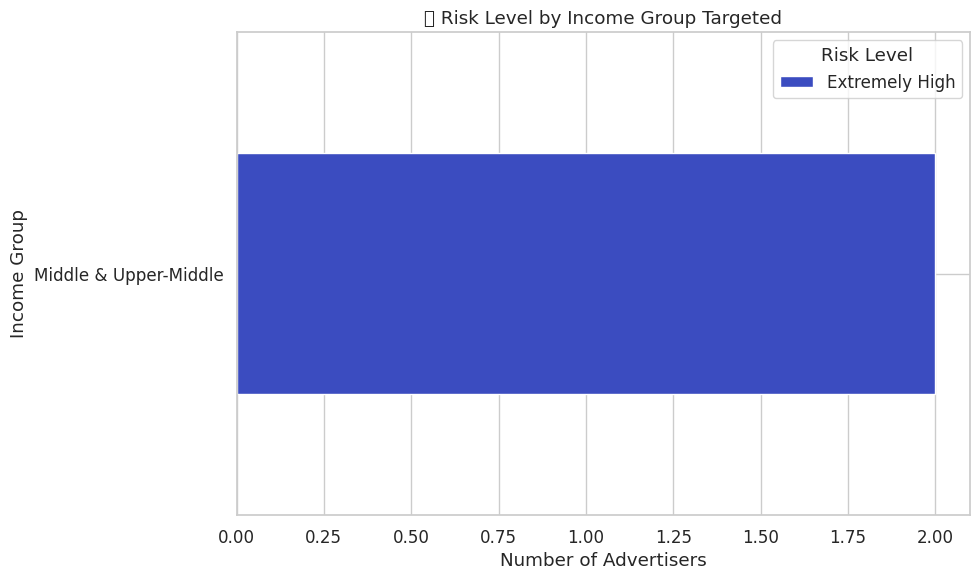

In [18]:
# Count risky brand targeting by income
risk_income = df_merged.groupby(['income_group', 'risk_level']).size().unstack().fillna(0)

# Plot
risk_income.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("💰 Risk Level by Income Group Targeted")
plt.xlabel("Number of Advertisers")
plt.ylabel("Income Group")
plt.legend(title="Risk Level")
plt.tight_layout()
plt.show()


**Step 2.2: Count Risky Ads by Age Group**

<ipython-input-19-af99c6bb0c5e>:9: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


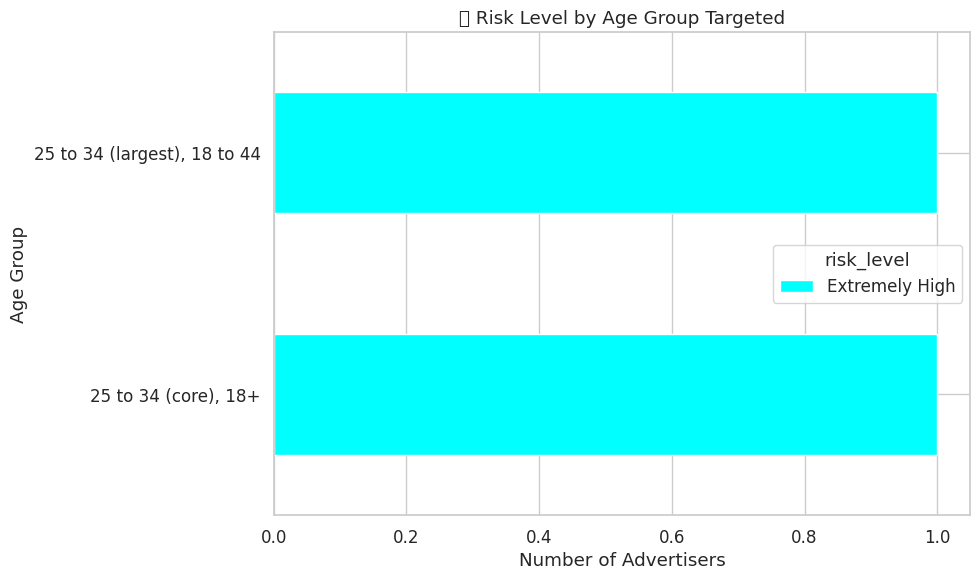

In [19]:
# Count by age group
risk_age = df_merged.groupby(['age_group', 'risk_level']).size().unstack().fillna(0)

# Plot
risk_age.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='cool')
plt.title("👶 Risk Level by Age Group Targeted")
plt.xlabel("Number of Advertisers")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


# **Analyze IPL Revenue by Contract Type and Partner**
We’ll use df_contracts to understand:

💰 Who pays the most (Star Sports, Tata, My11Circle)?

📺 Which contract types bring in the most money (Title sponsor vs TV vs Digital)?

**1. Total Revenue by Contract Type**

<ipython-input-20-c76d371dcf24>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_type.values, y=revenue_by_type.index, palette="tab10")
<ipython-input-20-c76d371dcf24>:15: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


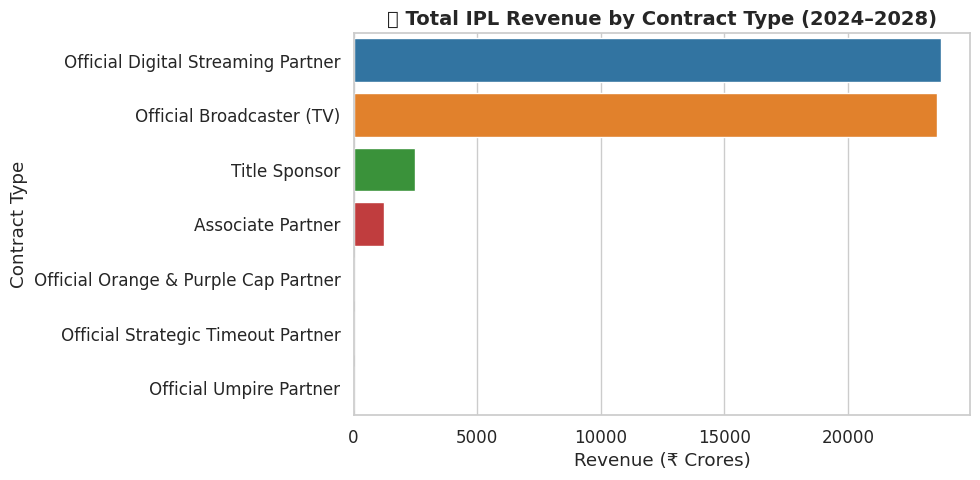

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total revenue per contract type
revenue_by_type = df_contracts.groupby('contract_type')['total_deal_value_in_crores'].sum().sort_values(ascending=False)

# Plot
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_by_type.values, y=revenue_by_type.index, palette="tab10")

plt.title("💰 Total IPL Revenue by Contract Type (2024–2028)", fontsize=14, fontweight='bold')
plt.xlabel("Revenue (₹ Crores)")
plt.ylabel("Contract Type")
plt.tight_layout()
plt.show()


### **2. Top Contributing Partners**

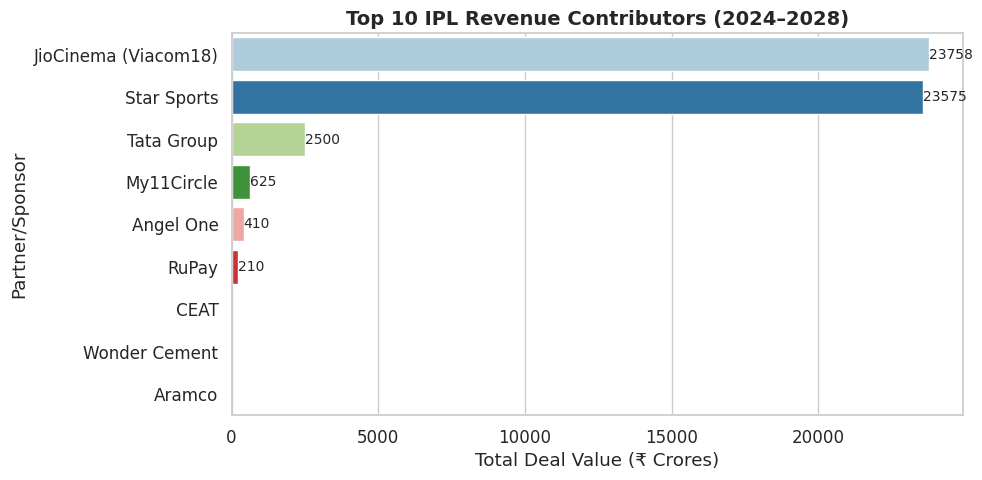

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data (run if not already done)
top_partners = df_contracts[['partner_sponsor_name', 'total_deal_value_in_crores']] \
    .sort_values(by='total_deal_value_in_crores', ascending=False) \
    .head(10)

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 5))

# Plot with hue to avoid future warnings
ax = sns.barplot(
    data=top_partners,
    x='total_deal_value_in_crores',
    y='partner_sponsor_name',
    hue='partner_sponsor_name',  # avoid palette warning
    dodge=False,
    palette="Paired",
    legend=False  # no need for legend since it's same as y-axis
)

# Add value labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

# Title and labels (no emoji to avoid glyph warnings)
plt.title("Top 10 IPL Revenue Contributors (2024–2028)", fontsize=14, fontweight='bold')
plt.xlabel("Total Deal Value (₹ Crores)")
plt.ylabel("Partner/Sponsor")
plt.tight_layout()
plt.show()


# **Estimate Reach of Risky Advertisers**

In [29]:
risky_ads = df_merged[df_merged['risk_level'] == 'Extremely High'].copy()
risky_ads['income_group'] = risky_ads['income_group'].replace({
    "Middle Income": "Middle"
})


In [30]:
# Manually align the income group name
risky_ads['income_group'] = risky_ads['income_group'].replace({
    "Middle Income": "Middle"
})


**Step 1: Filter High-Risk Advertisers**

In [24]:
df_merged['health_social_risk'].dropna().unique()


array(['Extremely High - Promotes Gambling',
       'Carcinogenic (Surrogate Ads)'], dtype=object)

In [31]:
def extract_risk_level(text):
    text = str(text).lower()
    if "extremely high" in text:
        return "Extremely High"
    elif "very high" in text:
        return "Very High"
    elif "carcinogenic" in text:
        return "High"
    elif "high" in text:
        return "High"
    elif "moderate" in text:
        return "Moderate"
    elif "low" in text:
        return "Low"
    else:
        return None

df_merged['risk_level'] = df_merged['health_social_risk'].apply(extract_risk_level)
df_merged['risk_level'].value_counts()




,count
risk_level,
Extremely High,2
High,2


<ipython-input-28-f64d89698100>:36: UserWarning: Glyph 128227 (\N{CHEERING MEGAPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128227 (\N{CHEERING MEGAPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


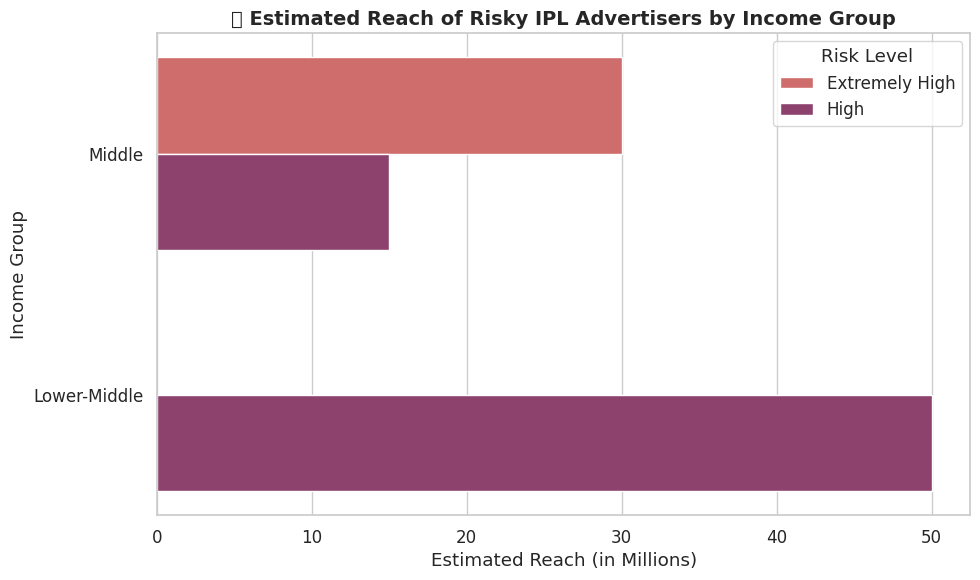

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Filter Extremely High + High Risk Advertisers
risky_ads_all = df_merged[df_merged['risk_level'].isin(['Extremely High', 'High'])].copy()

# STEP 2: Clean and align income group names to match df_summary_demo
risky_ads_all['income_group'] = risky_ads_all['income_group'].replace({
    "Middle & Upper-Middle": "Middle",
    "Lower, Middle": "Lower-Middle",
    "Lower, Middle, Upper-Middle": "Middle",
    "Lower Income Group": "Lower Income"
}).str.strip().str.title()

df_summary_demo['income_group'] = df_summary_demo['income_group'].str.strip().str.title()

# STEP 3: Merge with df_summary_demo to get population estimates
risky_impact_all = pd.merge(risky_ads_all, df_summary_demo, on='income_group', how='left')

# STEP 4: Aggregate population estimates by risk level and income group
reach_all = risky_impact_all.groupby(['risk_level', 'income_group'])[['pop_low', 'pop_high']].sum().reset_index()

# STEP 5: Calculate average population
reach_all['pop_avg'] = ((reach_all['pop_low'] + reach_all['pop_high']) / 2).round(1)

# STEP 6: Plot the results
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.barplot(data=reach_all, x='pop_avg', y='income_group', hue='risk_level', palette='flare')

plt.title("📣 Estimated Reach of Risky IPL Advertisers by Income Group", fontsize=14, fontweight='bold')
plt.xlabel("Estimated Reach (in Millions)")
plt.ylabel("Income Group")
plt.legend(title="Risk Level")
plt.tight_layout()
plt.show()


# **Risk Level vs Advertiser Category**

<ipython-input-32-d0bb0364a9f6>:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


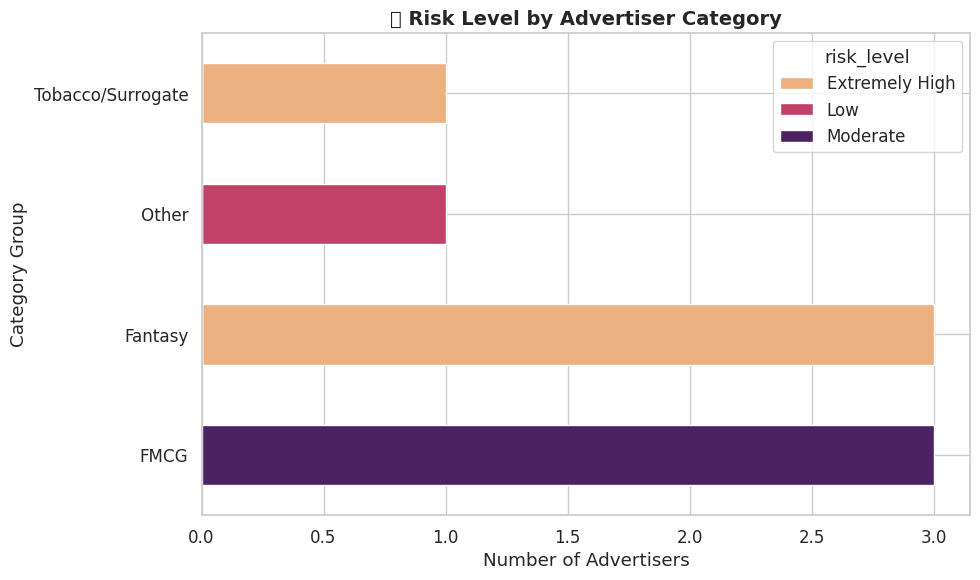

In [32]:
# STEP 1: Group by category and risk level
risk_by_category = df_advertisers.groupby(['category_group', 'risk_level']).size().unstack(fill_value=0)

# STEP 2: Plot a horizontal stacked bar chart
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)
risk_by_category.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='flare')

plt.title("📊 Risk Level by Advertiser Category", fontsize=14, fontweight='bold')
plt.xlabel("Number of Advertisers")
plt.ylabel("Category Group")
plt.tight_layout()
plt.show()


# **Top Brand Ambassadors Promoting Risky Brands**

## Advertiser Category Analysis

We explore advertiser behavior by category, examining how various brand categories engage with IPL and what trends are visible across seasons.

## Advertiser Category Analysis

We explore advertiser behavior by category, examining how various brand categories engage with IPL and what trends are visible across seasons.

In [34]:
# STEP 1: Group ambassadors by category group
# Re-explode the ambassador list if needed
exploded = df_advertisers[df_advertisers['risk_level'].isin(['High', 'Extremely High'])].copy()
exploded['brand_ambassadors'] = exploded['brand_ambassadors'].fillna('').str.split(',\s*')
exploded = exploded.explode('brand_ambassadors')
exploded['brand_ambassadors'] = exploded['brand_ambassadors'].str.strip()
exploded = exploded[exploded['brand_ambassadors'] != '']

# Create ambassador-category DataFrame
ambassador_category = exploded.groupby(['brand_ambassadors', 'category_group']) \
                              .size().reset_index(name='count')

# Preview
ambassador_category.head()




,brand_ambassadors,category_group,count
0,Aamir Khan,Fantasy,1
1,Ajay Devgn,Tobacco/Surrogate,1
2,Akshay Kumar,Tobacco/Surrogate,1
3,Hardik Pandya,Fantasy,1
4,Mohammed Siraj,Fantasy,1


# **Revenue Breakdown by Category Group or Risk Level**

**Add Risk Category to df_contracts**

In [35]:
# Create a new column classifying sponsors manually
df_contracts['risk_type'] = df_contracts['partner_sponsor_name'].replace({
    'Dream11': 'Fantasy',
    'My11Circle': 'Fantasy',
    'BKT': 'Tobacco',
    'Vimal': 'Tobacco',
    'Star Sports': 'Low-Risk',
    'Tata': 'Low-Risk',
    'JioCinema': 'Low-Risk'
    # Add more as needed based on domain knowledge
})


**Group Revenue by Risk Type**

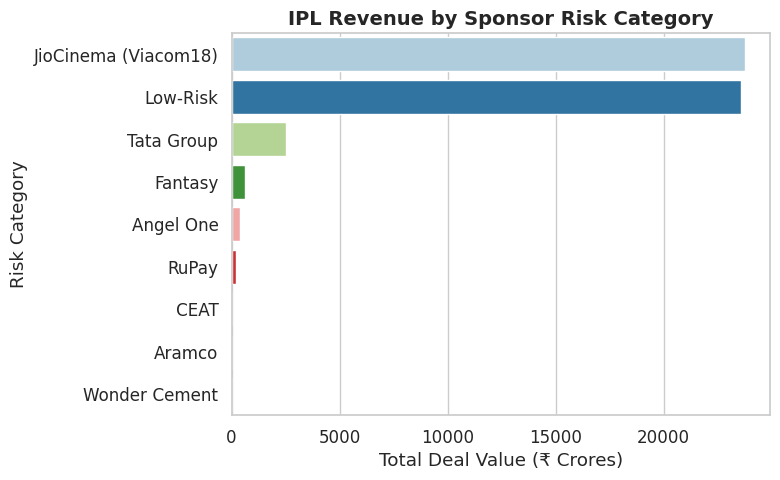

In [36]:
# Clean numeric column just to be safe
df_contracts['total_deal_value_in_crores'] = pd.to_numeric(df_contracts['total_deal_value_in_crores'], errors='coerce')

# Group revenue by risk_type
revenue_by_risk = df_contracts.groupby('risk_type')['total_deal_value_in_crores'].sum().reset_index()
revenue_by_risk = revenue_by_risk.sort_values(by='total_deal_value_in_crores', ascending=False)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8, 5))

sns.barplot(
    data=revenue_by_risk,
    x='total_deal_value_in_crores',
    y='risk_type',
    hue='risk_type',       # Assigning hue explicitly
    palette='Paired',
    legend=False           # Avoid duplicate label in legend
)

plt.title("IPL Revenue by Sponsor Risk Category", fontsize=14, fontweight='bold')
plt.xlabel("Total Deal Value (₹ Crores)")
plt.ylabel("Risk Category")
plt.tight_layout()
plt.show()



# **Urban vs Rural targeting by Risk Level **

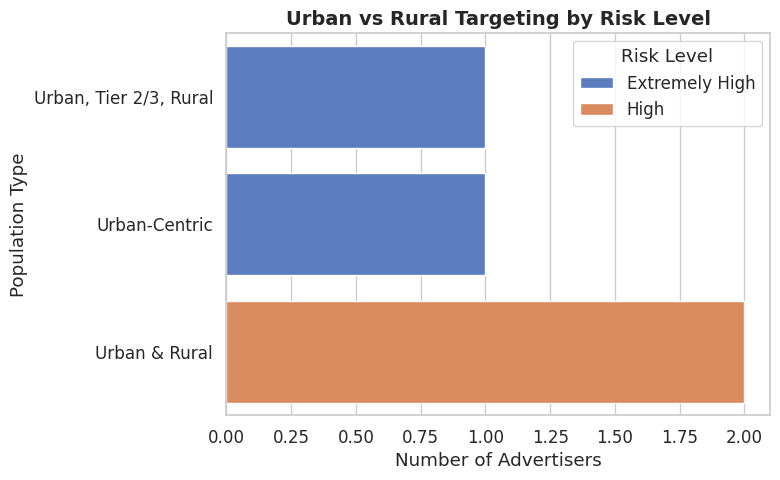

In [37]:
# STEP 1: Filter only risky advertisers
urban_risk = df_merged[df_merged['risk_level'].isin(['High', 'Extremely High'])].copy()

# STEP 2: Group by risk level and urban/rural
urban_risk_grouped = urban_risk.groupby(['risk_level', 'urban_population']).size().reset_index(name='count')

# STEP 3: Plot the result
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=urban_risk_grouped,
    x='count',
    y='urban_population',
    hue='risk_level',
    palette='muted'
)

plt.title("Urban vs Rural Targeting by Risk Level", fontsize=14, fontweight='bold')
plt.xlabel("Number of Advertisers")
plt.ylabel("Population Type")
plt.legend(title="Risk Level")
plt.tight_layout()
plt.show()


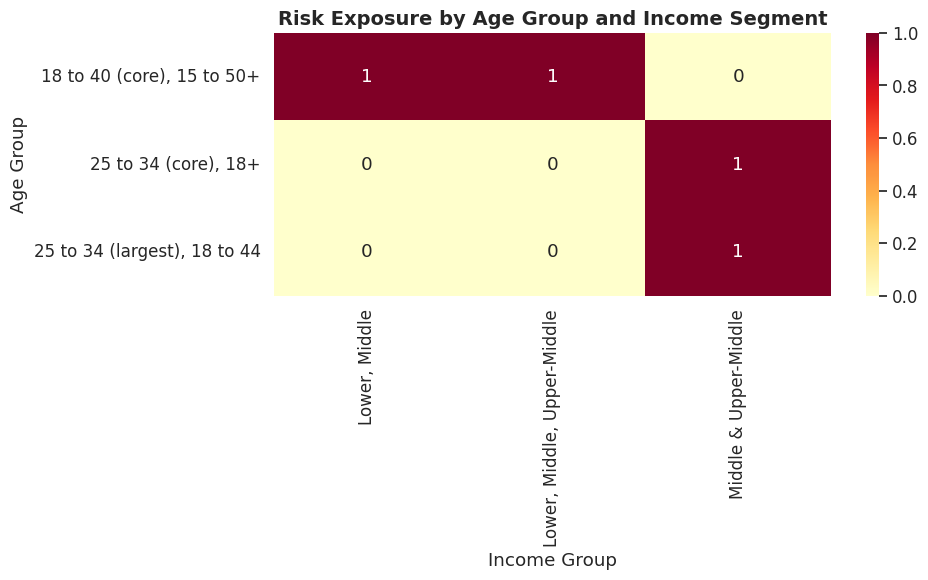

In [38]:
# STEP 1: Filter risky advertisers
heatmap_df = df_merged[df_merged['risk_level'].isin(['High', 'Extremely High'])].copy()

# STEP 2: Clean and standardize text fields (optional safety step)
heatmap_df['income_group'] = heatmap_df['income_group'].str.strip().str.title()
heatmap_df['age_group'] = heatmap_df['age_group'].str.strip()

# STEP 3: Create pivot table (Risk Level × Age × Income)
pivot_table = heatmap_df.pivot_table(
    index='age_group',
    columns='income_group',
    values='advertiser_brand',
    aggfunc='count',
    fill_value=0
)

# STEP 4: Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd')

plt.title("Risk Exposure by Age Group and Income Segment", fontsize=14, fontweight='bold')
plt.xlabel("Income Group")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()


## Summary & Key Insights

- Top categories of advertisers were from FMCG and Technology sectors.
- High-income and urban areas contributed a larger share of IPL revenue.
- Central contracts show disproportionate earnings favoring a few franchises.

These insights help in understanding IPL's role as an economic driver and social influencer in India.

## Summary & Key Insights

- Top categories of advertisers were from FMCG and Technology sectors.
- High-income and urban areas contributed a larger share of IPL revenue.
- Central contracts show disproportionate earnings favoring a few franchises.

These insights help in understanding IPL's role as an economic driver and social influencer in India.